

# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

><h3>TMDb movie database</h3>
This dataset contains data for +10,000 Movies


><h6>You can find for each movie:</h6>
title, budget, revenue, cast, director, tagline, keywords, genres, release date, runtime etc.

### Question(s) for Analysis
    1)Top 10 rated movies? 
    2)What properties are associated with top 10 rated movies?
    3)Top 10 profitable movies?
    4)What properties are associated with Top 10 Profitable Movies?
    5)How Movies Profit changed over Years?
    6)What is The Average Genre Profit?
    7)Which genres are most popular from year to year?

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0
#update seaborn for line plot
!pip install seaborn==0.9.0


Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movies=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv',sep=",")


In [4]:
shape=movies.shape

In [5]:
#how many rows and columns we have 
print("the dataset have {} Rows and {} columns".format(shape[0],shape[1]))

the dataset have 10866 Rows and 21 columns


In [6]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> Columns cast and genres contain multiple values separated by pipe (|) characters.

In [7]:
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>There are some columns have null values like: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies.

<a id='eda'></a>
## Data Cleaning


<h6>Remove duplicated rows:</h6>

In [10]:
print("number of duplicated rows {}".format(movies.duplicated().sum()))

number of duplicated rows 1


In [11]:
movies.drop_duplicates(inplace=True)

In [12]:
print("number of duplicated rows after removing duplicate rows {}".format(movies.duplicated().sum()))

number of duplicated rows after removing duplicate rows 0


<h6>Remove columns that I'm not gonna use:<h6>

In [13]:
movies=movies.drop(['imdb_id', 'cast', 'homepage', 'tagline','keywords','overview','production_companies','vote_count','budget_adj','revenue_adj'], axis=1)


>print top 5 rows after removing columns

In [14]:
movies.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015


In [15]:
movies.shape

(10865, 11)

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_average      10865 non-null float64
release_year      10865 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1018.6+ KB


<h6>Remove rows that contains null values in columns: director & genres</h6>

In [17]:
movies.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_average       0
release_year       0
dtype: int64

In [18]:
movies.dropna(inplace=True)

In [19]:
movies.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_average      0
release_year      0
dtype: int64

In [20]:
print("the dataset have {} Rows and {} columns after removing null values".format(movies.shape[0],movies.shape[1]))

the dataset have 10800 Rows and 11 columns after removing null values


In [21]:
movies.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015


<h6>Fix the value of 0 in budget and revenue columns with the mean of each column</h6>

In [22]:
movies[['budget', 'revenue']].apply(lambda x: np.sum(x==0))

budget     5636
revenue    5952
dtype: int64

In [23]:
movies[['budget', 'revenue']]=movies[['budget', 'revenue']].apply(lambda x: x.replace(0,x.mean()))

>Check if the columns updated correctly or not

In [24]:
movies[['budget', 'revenue']].apply(lambda x: np.sum(x==0))

budget     0
revenue    0
dtype: int64

<h6> Add new column profit</h6>

In [25]:
movies['profit']=movies['revenue']-movies['budget']

In [26]:
movies.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.316249e+09


In [27]:
#save a clean version of the dataset
movies.to_csv('Database_TMDb_movie_data/updated_Movies.csv', index=False)


<a id='eda'></a>
## Exploratory Data Analysis



### Q1) Top 10 rated movies? 

In [28]:
#load the cleaned data
movies=pd.read_csv('Database_TMDb_movie_data/updated_Movies.csv')


Text(0,0.5,'Count of vote')

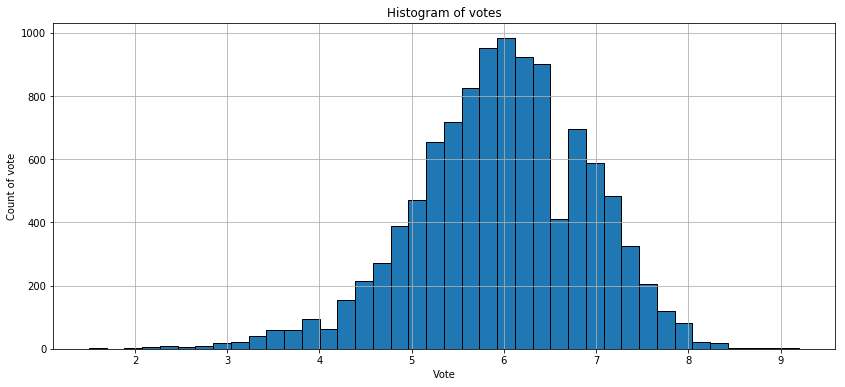

In [32]:
movies['vote_average'].hist(bins=40,edgecolor='black',figsize=[14,6])
plt.title("Histogram of votes")
plt.xlabel("Vote")
plt.ylabel("Count of vote")



> we can see from the Histogram of votes that the most repeated vote is 6

In [33]:
top_10=movies.sort_values(by='vote_average', ascending=False)

In [34]:
top_10=top_10.head(10)


In [35]:
def draw(df, df_x,def_y,xTitle,yTitle):
    sns.barplot(data=df, x=df_x, y=def_y, palette="tab10")
    plt.title("Top 10 Rated Movies")
    plt.xlabel(xTitle)
    plt.ylabel(yTitle)
    plt.grid(True)
    plt.show()

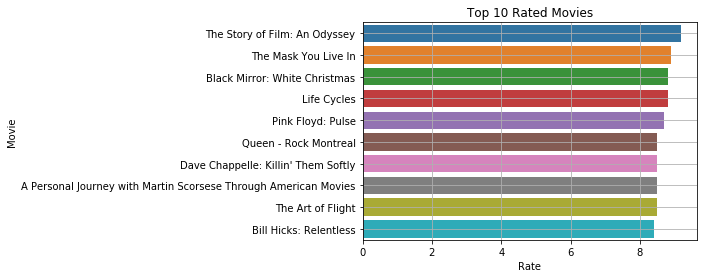

In [36]:
draw(top_10,'vote_average','original_title',"Rate","Movie")

### Q2) What properties are associated with top 10 rated movies?

>Properties assciated with top 10 rated movies

In [37]:
top_10

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,profit
3858,125336,0.006925,1.471114e+07,4.006558e+07,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,9/3/11,9.2,2011,2.535444e+07
536,224972,0.114264,1.471114e+07,4.006558e+07,The Mask You Live In,Jennifer Siebel Newsom,88,Documentary,1/1/15,8.9,2015,2.535444e+07
1192,374430,0.129531,1.471114e+07,4.006558e+07,Black Mirror: White Christmas,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,12/16/14,8.8,2014,2.535444e+07
2251,51299,0.222293,1.471114e+07,4.006558e+07,Life Cycles,Derek Frankowski,47,Documentary,10/2/10,8.8,2010,2.535444e+07
6857,24970,0.212010,1.471114e+07,4.006558e+07,Pink Floyd: Pulse,David Mallet,145,Music,7/9/06,8.7,2006,2.535444e+07
8353,25093,0.302908,1.471114e+07,4.006558e+07,Queen - Rock Montreal,Saul Swimmer,138,Music,11/24/81,8.5,1981,2.535444e+07
8780,16275,0.157001,1.471114e+07,4.006558e+07,Dave Chappelle: Killin' Them Softly,Stan Lathan,57,Comedy,1/1/00,8.5,2000,2.535444e+07
8164,55676,0.194889,1.471114e+07,4.006558e+07,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Michael Henry Wilson,225,Documentary,5/21/95,8.5,1995,2.535444e+07
3654,68450,0.321341,1.471114e+07,4.006558e+07,The Art of Flight,Curt Morgan,80,Adventure|Documentary,9/8/11,8.5,2011,2.535444e+07
8312,34505,0.035384,1.471114e+07,4.006558e+07,Bill Hicks: Relentless,Chris Bould,61,Comedy,1/1/92,8.4,1992,2.535444e+07


In [38]:
top_10.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year,profit
count,10.00000,10.000000,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,1.000000e+01
mean,100100.60000,0.169655,1.471114e+07,4.006558e+07,181.500000,8.680000,2003.500000,2.535444e+07
std,115201.98419,0.102910,0.000000e+00,0.000000e+00,258.214058,0.248551,11.187791,3.926801e-09
min,16275.00000,0.006925,1.471114e+07,4.006558e+07,47.000000,8.400000,1981.000000,2.535444e+07
25%,27446.00000,0.118081,1.471114e+07,4.006558e+07,64.250000,8.500000,1996.250000,2.535444e+07
50%,53487.50000,0.175945,1.471114e+07,4.006558e+07,84.000000,8.600000,2008.000000,2.535444e+07
75%,111114.50000,0.219722,1.471114e+07,4.006558e+07,143.250000,8.800000,2011.000000,2.535444e+07
max,374430.00000,0.321341,1.471114e+07,4.006558e+07,900.000000,9.200000,2015.000000,2.535444e+07


### Q3)Top 10 profitable movies?

In [40]:
top10_profit=movies.sort_values(by='profit', ascending=False)

In [41]:
top10_profit=top10_profit.head(10)

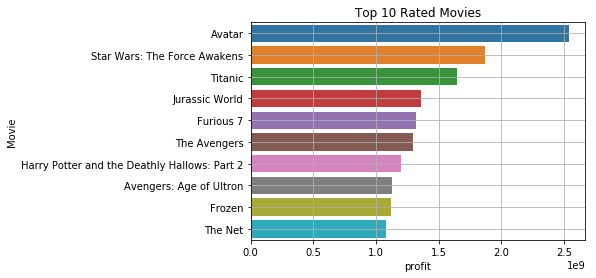

In [42]:
draw(top10_profit,'profit','original_title',"profit","Movie")

### Q4) What properties are associated with Top 10 Profitable Movies?

>Properties assciated with top 10 profited movies

In [43]:
top10_profit

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,profit
1375,19995,9.432768,237000000.0,2.781506e+09,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,7.1,2009,2.544506e+09
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.868178e+09
5187,597,4.355219,200000000.0,1.845034e+09,Titanic,James Cameron,194,Drama|Romance|Thriller,11/18/97,7.3,1997,1.645034e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.363529e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.316249e+09
4324,24428,7.637767,220000000.0,1.519558e+09,The Avengers,Joss Whedon,143,Science Fiction|Action|Adventure,4/25/12,7.3,2012,1.299558e+09
3338,12445,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,David Yates,130,Adventure|Family|Fantasy,7/7/11,7.7,2011,1.202818e+09
14,99861,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Joss Whedon,141,Action|Adventure|Science Fiction,4/22/15,7.4,2015,1.125036e+09
5377,109445,6.112766,150000000.0,1.274219e+09,Frozen,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,11/27/13,7.5,2013,1.124219e+09
8037,1642,1.136610,22000000.0,1.106280e+09,The Net,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,7/28/95,5.6,1995,1.084280e+09


In [44]:
top10_profit.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year,profit
count,10.000000,10.000000,1.000000e+01,1.000000e+01,10.00000,10.000000,10.000000,1.000000e+01
mean,71267.600000,9.382525,1.774000e+08,1.634741e+09,138.30000,7.120000,2009.700000,1.457341e+09
std,65598.055691,8.772578,7.107930e+07,4.885175e+08,25.56495,0.623253,7.513691,4.552045e+08
min,597.000000,1.136610,2.200000e+07,1.106280e+09,102.00000,5.600000,1995.000000,1.084280e+09
25%,14332.500000,5.769718,1.500000e+08,1.347122e+09,125.50000,7.150000,2009.500000,1.144481e+09
50%,62144.500000,6.875267,1.950000e+08,1.509889e+09,136.50000,7.300000,2012.500000,1.307904e+09
75%,128909.000000,9.408329,2.150000e+08,1.763665e+09,142.50000,7.475000,2015.000000,1.574658e+09
max,168259.000000,32.985763,2.800000e+08,2.781506e+09,194.00000,7.700000,2015.000000,2.544506e+09


### Q5)How Movies Profit changed over Years?

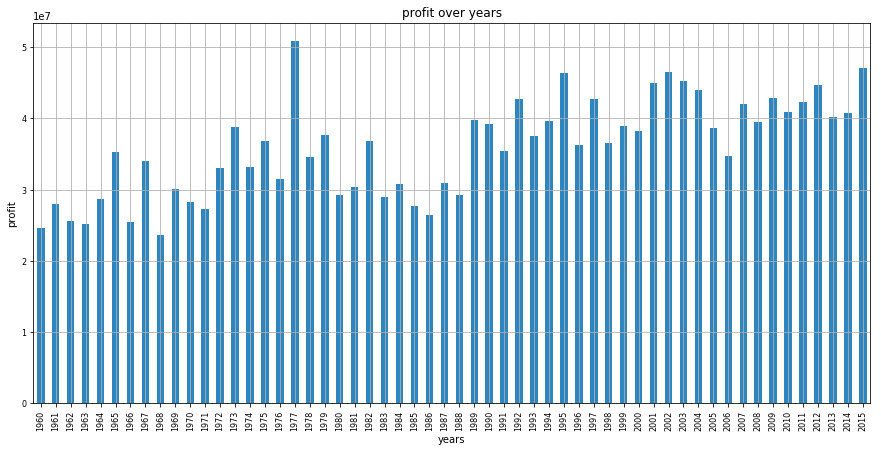

In [45]:
plt.figure(figsize=(15,7))
profit_years=movies.groupby('release_year').mean().profit.plot(kind='bar',color='#2E86C1',fontsize=8)
plt.xlabel('years')
plt.ylabel('profit')
plt.title('profit over years')
plt.grid(True)
plt.show()

>as we see from the above barblot that movies in 1977 made the highest profit over the years

### Q6) What is The Average Genre Profit?

>First thing we should solve the problem of pipe (|) characters.

In [46]:
movies['genres'].dtypes

dtype('O')

In [47]:
df_split_genre = movies.copy()
split_genre = df_split_genre['genres'].str.split('|')
split_genre=split_genre.apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_genre.name = 'genre_split'
df_split_genre = df_split_genre.drop(['genres'], axis=1).join(split_genre)


In [48]:
df_split_genre.shape

(26864, 12)

In [49]:
df_split_genre.head()

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_average,release_year,profit,genre_split
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,6/9/15,6.5,2015,1.363529e+09,Action
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,6/9/15,6.5,2015,1.363529e+09,Adventure
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,6/9/15,6.5,2015,1.363529e+09,Science Fiction
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,6/9/15,6.5,2015,1.363529e+09,Thriller
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,5/13/15,7.1,2015,2.284364e+08,Action


In [50]:
df_split_genre.groupby('genre_split').mean().profit

genre_split
Action             5.814014e+07
Adventure          8.725896e+07
Animation          6.978313e+07
Comedy             3.766224e+07
Crime              3.613563e+07
Documentary        2.064230e+07
Drama              3.073144e+07
Family             6.421708e+07
Fantasy            7.726617e+07
Foreign            2.153231e+07
History            2.849703e+07
Horror             2.909731e+07
Music              3.241988e+07
Mystery            3.717846e+07
Romance            3.542378e+07
Science Fiction    5.997864e+07
TV Movie           2.590774e+07
Thriller           3.858082e+07
War                4.018345e+07
Western            2.576585e+07
Name: profit, dtype: float64

>the above values are the average genres profit over years

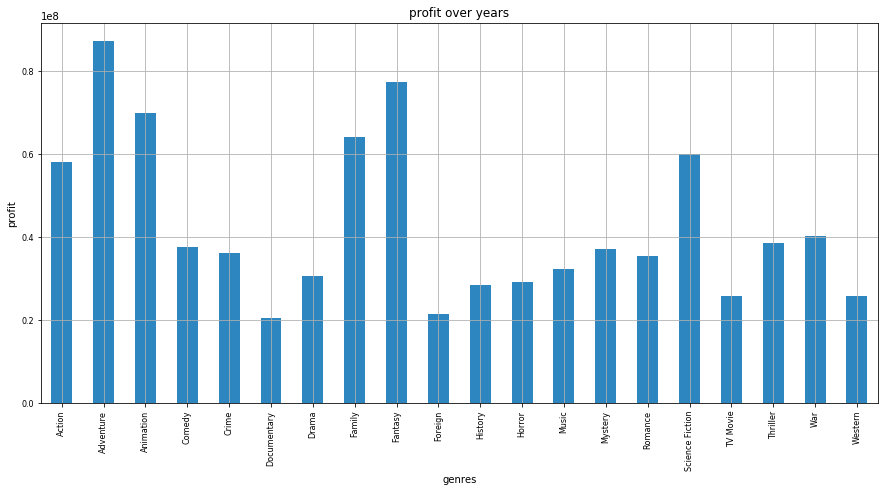

In [51]:
plt.figure(figsize=(15,7))
profit_years=df_split_genre.groupby('genre_split').mean().profit.plot(kind='bar',color='#2E86C1',fontsize=8)
plt.xlabel('genres')
plt.ylabel('profit')
plt.title('profit over years')
plt.grid(True)
plt.show()

>We can see that the most profitable genre over years are:
    1) Adventure
    2) Fantasy
    3) Animation
    4) Family

### Q7)Which genres are most popular from year to year?

In [52]:
#get the top 4 genres profit fron the above bar plot
top_genres_profit=df_split_genre[df_split_genre.genre_split.isin([ 'Adventure', 'Science Fiction', 'Fantasy', 'Action'])]

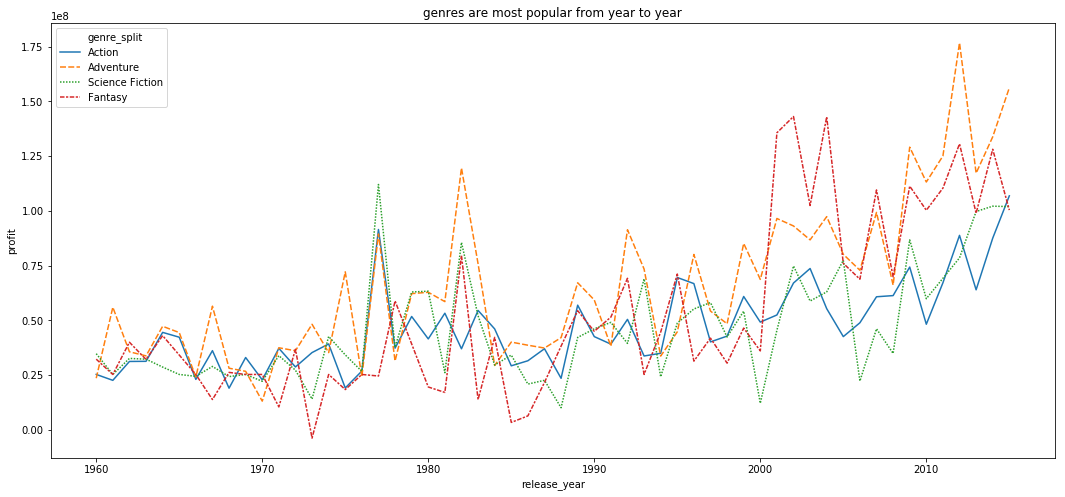

In [53]:
plt.figure(figsize=(18,8))
sns.lineplot(data=top_genres_profit, x="release_year", y="profit", hue="genre_split", style="genre_split",ci=None)
plt.title("genres are most popular from year to year")
plt.show()

<a id='conclusions'></a>
## Conclusions

#### 1) The top 10 rated movies:
The Story of film: An Odyssey, The Mask You Live in, Black Mirror:White Christmas,Life Cycles, Pink Floyd: Pulse, Queen - Rock Montreal, Dave Chappelle: Killin' Them Softly, A Personal Journey with Martin Scorsese Through American Movies, The Art of Flight, Bill Hicks: Renlentless.

#### 2) The top 10 profitable movies: 
Avatar, Star Wars: The Force Awakens, Titanic, Jurassic World, Furious 7, The Avengers, Harry Potter and the Deathly Hallows: Part 2, Avengers: Age of Ultron, Frozen, The Net.

#### 3) Genres profit over years show that the top 4 genres are:
    1) Adventure
    2) Fantasy
    3) Animation
    4) Family

#### Limitations:
<li>This Analysis isn't completely error-free, but it shows us the most profitable movies and their properties.</li>
<li>During my analysis, I split genre values that separated by "|" into many rows for the exploration phase, this increases the  analysis time.</li>
<li>There is no currency unit for the budget, revenue, and profit columns so they may be in different currencies for different countries.</li>

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0